# The Sparks Foundation Internship
## Task 1 - Data Science and Business Analytics
## Prediction Using Supervised ML
* Predict the percentage of a student based on the number of hours studied.
* Data can be found at 'http://bit.ly/w-data'.
* To predict the score if a student studies for 9.25 hours per day.

## Name : Nawaz Siddiqui

### Importing required libraries

In [1]:
import numpy as np                                     # Required for mathematical operations
import pandas as pd                                    # Required for data manupilation and storage
import matplotlib.pyplot as plt                        # Required for plotting
import seaborn as sns                                  # Required for plotting
from sklearn.linear_model import LinearRegression      # Required for creating ML model
from sklearn.model_selection import train_test_split   # Required for splitting the data in training and testing sets
from sklearn.metrics import mean_squared_error         # Required to get the performance of the ML model

### Reading the data

In [2]:
url_data = 'http://bit.ly/w-data' 
df = pd.read_csv(url_data)           # directly importing data into pandas DataFrame from given url
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking missing values

In [3]:
print('Number of null values in Hours column: ',df['Hours'].isnull().sum())
print('Number of null values in Scores column: ', df['Scores'].isnull().sum())

Number of null values in Hours column:  0
Number of null values in Scores column:  0


Here we can see that there are no missing values

### Model Development

We will use regression plot to get a visual representation of correlation between scores and hours/day studied

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

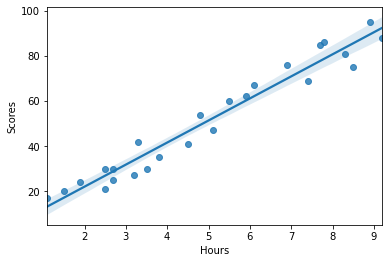

In [4]:
sns.regplot(x = 'Hours', y = 'Scores', data = df)

Using regression plot, we see that scores of students is positively correlated with amount of hours studied and it is linear in nature.

Hence we will use linear regression model.
_____
Now, we will split the data into training and testing part using ${train\_test\_split}$ from sklearn model selection

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']], df['Scores'], test_size = 0.2)

Using ${LinearRegression}$ model from sklear.linear_model

In [7]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_hat = lr.predict(x_test)
print('Mean Squared error is: ', mean_squared_error(y_hat, y_test))
print('R^2 value is: ', lr.score(x_test, y_test))

Mean Squared error is:  26.190837300662587
R^2 value is:  0.9569059541584465


This $R^2$ value tells us that over $95 \%$ of the scores can be explained by the number of hours one studies

### Predicting score of a person who studies 9.25 hrs/day

In [8]:
hours_per_day = 9.25
print('Prediction of score for number of hours studied', hours_per_day, 'is', 
      lr.predict(np.array([hours_per_day]).reshape(-1,1))[0])

Prediction of score for number of hours studied 9.25 is 91.81758724778899


### Conclusion :
* The linear regression model explains $95\%$ of the given data
* If a student studies for 92.5 hours/day, then, according to our model the score of the student will be approximately 91.82.